# ARTIGO: MELHORIA NA PREVISÃO DE IRRADIÂNCIA SOLAR USANDO TÉCNICAS DE DEEP LEARNING

Integrantes:
*   RA 1700737 Grasiely Lima Pastori Vieira
*   RA 1901025 Larissa de Almeida Ribeiro
*   RA 2401325 Edilson Claudino da Silva
*   RA 2401327 Allison Melo dos Santos
*   RA 2402439 Leticia Santos Rosa







## Modelos de Deep Learning

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [5]:
# Carregar os dados
df = pd.read_csv('/content/global_horizontal_means.csv', delimiter=';')
df

,ID,COUNTRY,LON,LAT,ANNUAL,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1,Brasil,-53.549,-33.7005,4444,6603,5747,4999,3597,2536,2172,2292,2924,3784,5180,6453,7037
1,2,Brasil,-53.449,-33.7005,4446,6610,5735,4986,3588,2550,2167,2280,2926,3810,5199,6470,7036
2,3,Brasil,-53.349,-33.7005,4452,6630,5732,4989,3572,2563,2170,2279,2928,3820,5213,6465,7058
3,4,Brasil,-53.249,-33.7005,4468,6709,5820,5047,3575,2555,2151,2247,2904,3818,5219,6476,7090
4,5,Brasil,-53.549,-33.6005,4454,6658,5771,5014,3620,2546,2159,2271,2932,3797,5168,6443,7072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72267,72268,Brasil,-60.349,5.1995,4655,4138,4328,4684,4875,4514,4447,4622,5019,5303,5055,4717,4156
72268,72269,Brasil,-60.249,5.1995,4603,3992,4190,4483,4751,4426,4459,4654,5060,5396,5079,4676,4073
72269,72270,Brasil,-60.149,5.1995,4567,3949,4090,4361,4604,4370,4402,4732,5103,5464,5107,4645,3972
72270,72271,Brasil,-60.249,5.2995,4725,4048,4271,4554,4867,4554,4545,4769,5224,5603,5274,4849,4138


In [6]:
print(df.columns)

Index(['ID', 'COUNTRY', 'LON', 'LAT', 'ANNUAL', 'JAN', 'FEB', 'MAR', 'APR',
       'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'],
      dtype='object')


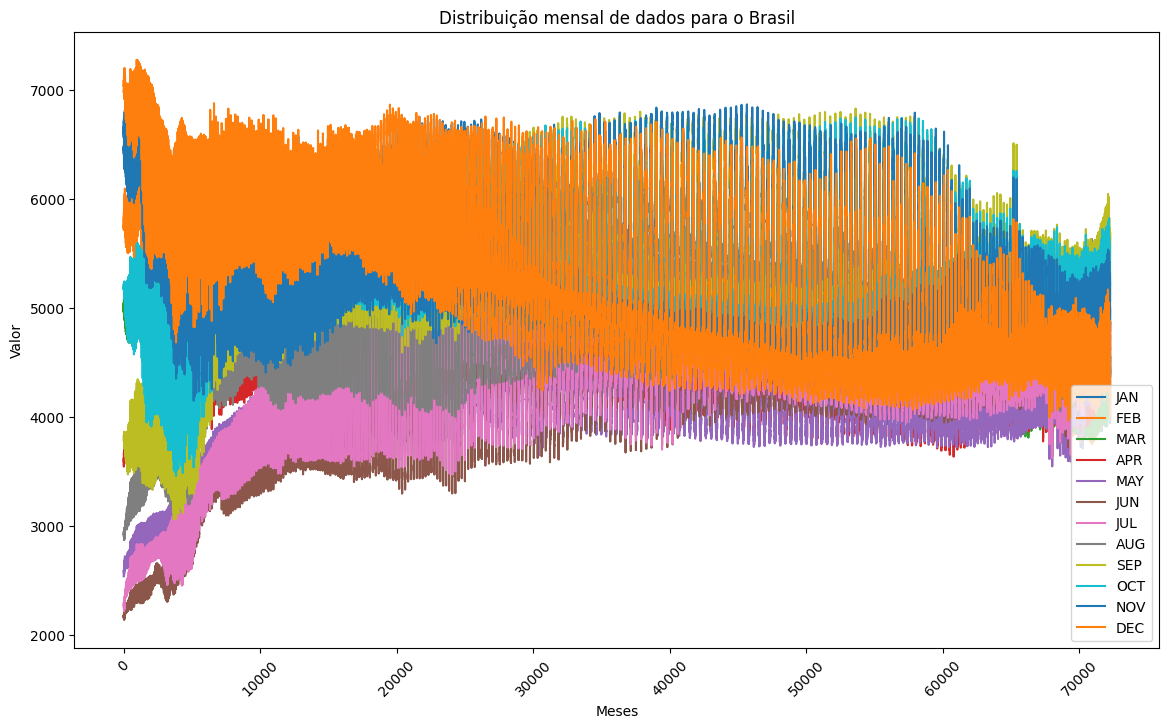

In [8]:
country_data = df[df['COUNTRY'] == 'Brasil']
country_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].plot(kind='line', figsize=(14, 8))
plt.title('Distribuição mensal de dados para o Brasil')
plt.ylabel('Valor')
plt.xlabel('Meses')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Preparar os dados
X = df.drop(['ID', 'COUNTRY', 'ANNUAL'], axis=1)
y = df['ANNUAL']

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Utilizando o Modelo MLP (Multi-Layer Perceptron)

In [ ]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Criar o modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

# Compilar o modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Treinar o modelo
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=0)

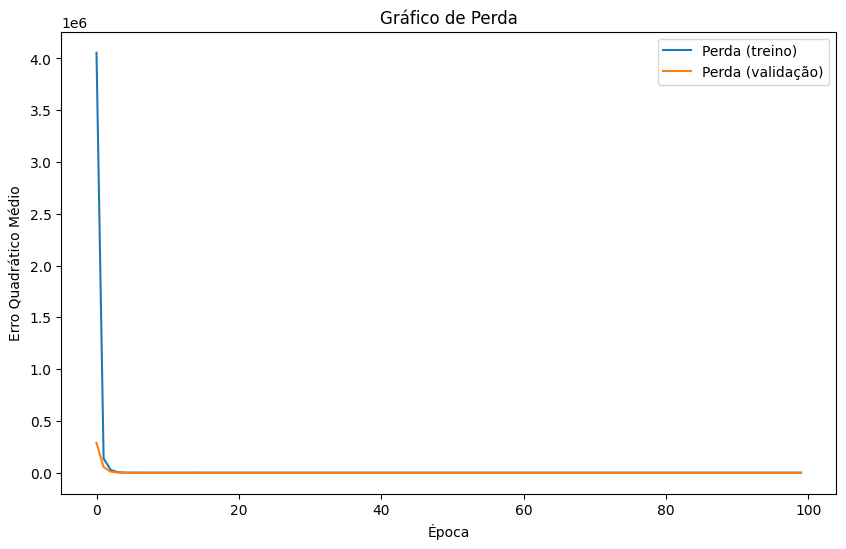

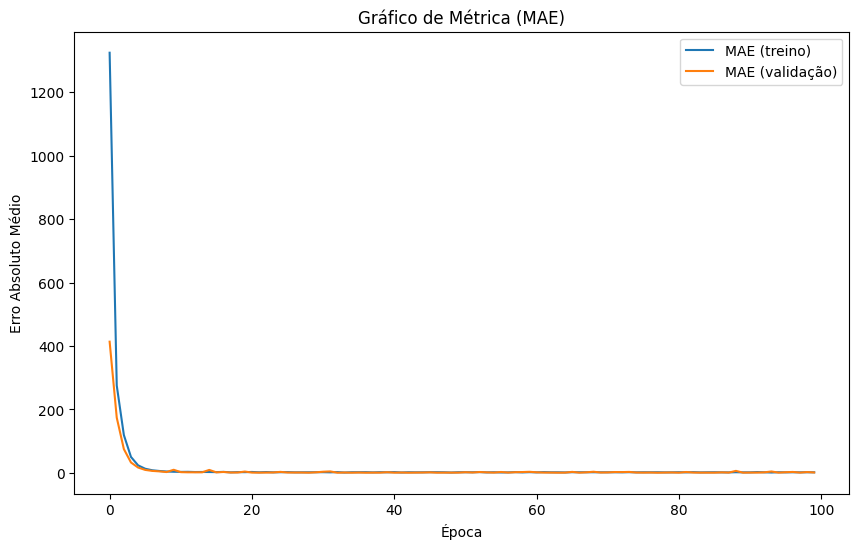

In [ ]:
def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Perda (treino)')
    plt.plot(history.history['val_loss'], label='Perda (validação)')
    plt.title('Gráfico de Perda')
    plt.xlabel('Época')
    plt.ylabel('Erro Quadrático Médio')
    plt.legend()
    plt.show()

def plot_metric(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['mae'], label='MAE (treino)')
    plt.plot(history.history['val_mae'], label='MAE (validação)')
    plt.title('Gráfico de Métrica (MAE)')
    plt.xlabel('Época')
    plt.ylabel('Erro Absoluto Médio')
    plt.legend()
    plt.show()

# Plotar os gráficos
plot_loss(history)
plot_metric(history)

In [ ]:
# Avaliar o modelo
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Erro Quadrático Médio (MSE) no teste: {test_loss:.2f}")
print(f"Erro Absoluto Médio (MAE) no teste: {test_mae:.2f}")

# Fazer previsões
y_pred = model.predict(X_test)

# Calcular R²
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de Determinação (R²): {r2:.4f}")

Erro Quadrático Médio (MSE) no teste: 2.32
Erro Absoluto Médio (MAE) no teste: 1.18
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Coeficiente de Determinação (R²): 1.0000


## Utilizando o Modelo LSTM (Long Short-Term Memory)

In [ ]:
# Redimensionar para o formato adequado para LSTM (n_amostras, n_tempos, n_features)
X_scaled_reshaped = np.reshape(X_scaled, (X_scaled.shape[0], X_scaled.shape[1], 1))

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled_reshaped, y, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Criar o modelo LSTM
model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True),
    LSTM(32, activation='relu'),
    Dense(1)
])

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Treinar o modelo
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1446/1446 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - loss: 3995121.5000 - mae: 1092.9619 - val_loss: 9406.1123 - val_mae: 80.0478
Epoch 2/100
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 37s 13ms/step - loss: 3695.6304 - mae: 46.8251 - val_loss: 2474.1819 - val_mae: 37.2140
Epoch 3/100
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - loss: 3263.1326 - mae: 44.5703 - val_loss: 2167.8005 - val_mae: 35.5488
Epoch 4/100
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - loss: 2740.8462 - mae: 40.7346 - val_loss: 1129.8351 - val_mae: 26.4536
Epoch 5/100
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - loss: 1926.7716 - mae: 33.7627 - val_loss: 786.0410 - val_mae: 21.7903
Epoch 6/100
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - loss: 1697.2748 - mae: 31.3457 - val_loss: 422.2686 - val_mae: 15.5496
Epoch 7/100
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 2255.4282 - mae: 35.0798 - val_loss: 496.2907 - val_mae: 17.9887
Epoch 8/100
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - loss: 1241.3580 - mae: 27.0973 - v

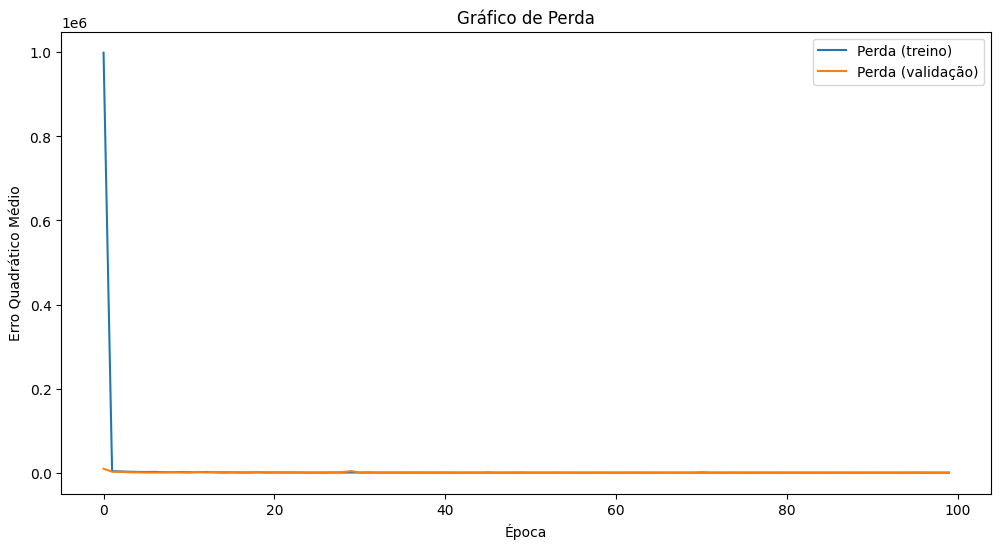

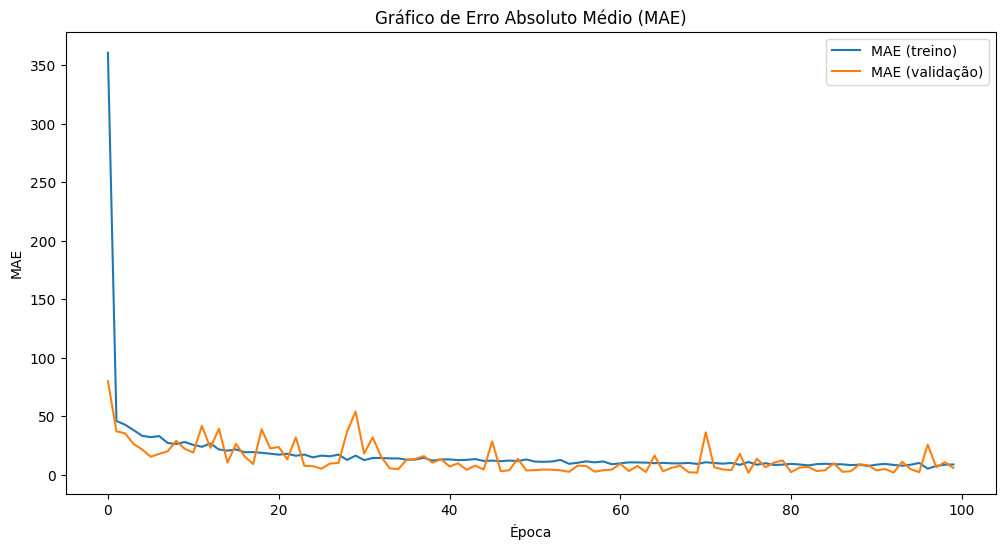

In [ ]:
import matplotlib.pyplot as plt

# Função para plotar a perda (loss)
def plot_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Perda (treino)')
    plt.plot(history.history['val_loss'], label='Perda (validação)')
    plt.title('Gráfico de Perda')
    plt.xlabel('Época')
    plt.ylabel('Erro Quadrático Médio')
    plt.legend()
    plt.show()

# Função para plotar a métrica MAE
def plot_metric(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['mae'], label='MAE (treino)')
    plt.plot(history.history['val_mae'], label='MAE (validação)')
    plt.title('Gráfico de Erro Absoluto Médio (MAE)')
    plt.xlabel('Época')
    plt.ylabel('MAE')
    plt.legend()
    plt.show()

# Plotar os gráficos
plot_loss(history)
plot_metric(history)

In [ ]:
# Avaliar o modelo no conjunto de teste
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Erro Quadrático Médio (MSE) no teste: {test_loss:.2f}")
print(f"Erro Absoluto Médio (MAE) no teste: {test_mae:.2f}")

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular o R² para avaliar a qualidade da previsão
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de Determinação (R²): {r2:.4f}")

452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 44.3915 - mae: 6.0475
Erro Quadrático Médio (MSE) no teste: 44.24
Erro Absoluto Médio (MAE) no teste: 6.04
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Coeficiente de Determinação (R²): 0.9998


## Utilizando o Modelo GRU (Gated Recurrent Unite)

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
# Redimensionar para o formato adequado para GRU (n_amostras, n_tempos, n_features)
X_scaled_reshaped = np.reshape(X_scaled, (X_scaled.shape[0], X_scaled.shape[1], 1))

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled_reshaped, y, test_size=0.2, random_state=42)

In [ ]:
# Criar o modelo GRU
model = Sequential([
    GRU(64, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True),
    GRU(32, activation='relu'),
    Dense(1)
])

# Compilar o modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Treinar o modelo
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=0)

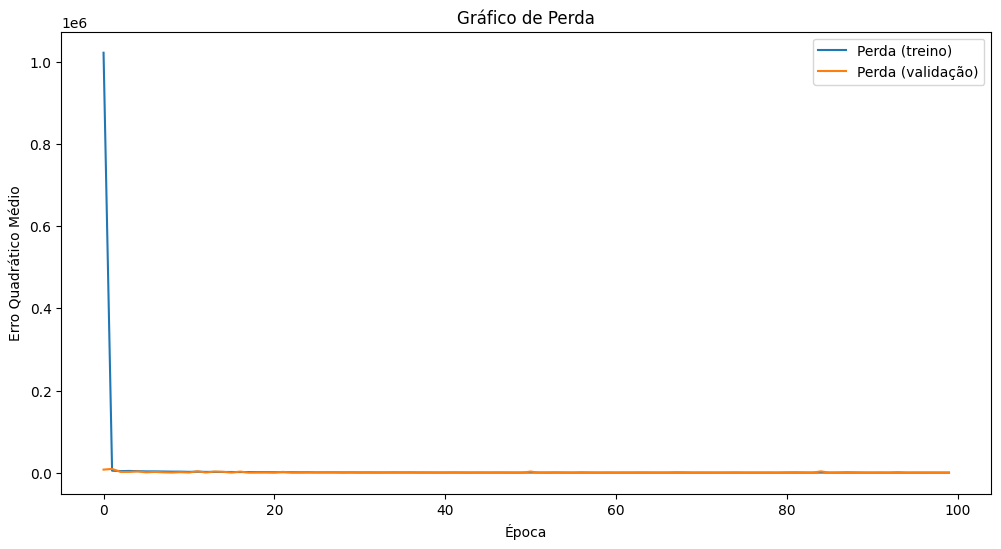

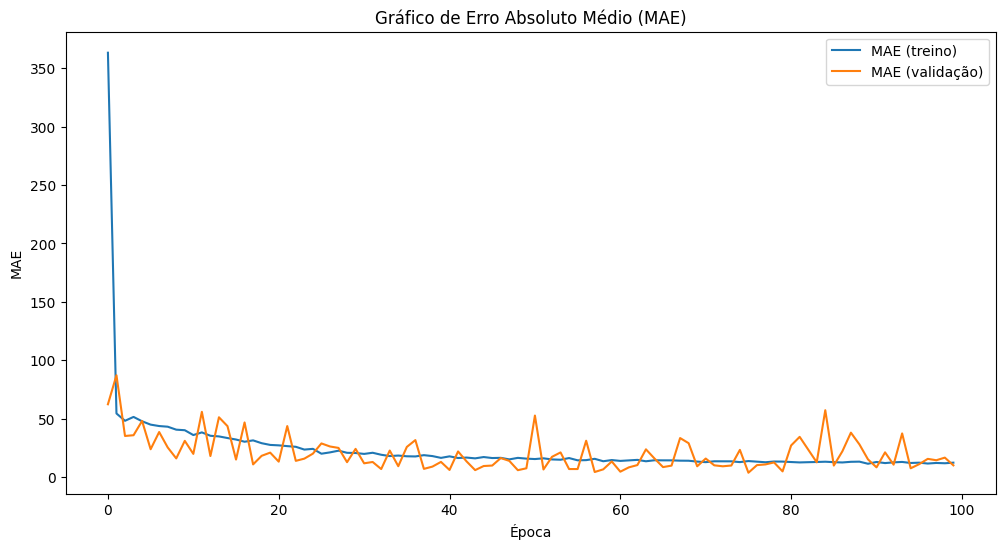

In [ ]:
# Funções para plotar os gráficos
def plot_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Perda (treino)')
    plt.plot(history.history['val_loss'], label='Perda (validação)')
    plt.title('Gráfico de Perda')
    plt.xlabel('Época')
    plt.ylabel('Erro Quadrático Médio')
    plt.legend()
    plt.show()

def plot_metric(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['mae'], label='MAE (treino)')
    plt.plot(history.history['val_mae'], label='MAE (validação)')
    plt.title('Gráfico de Erro Absoluto Médio (MAE)')
    plt.xlabel('Época')
    plt.ylabel('MAE')
    plt.legend()
    plt.show()

# Plotar os gráficos
plot_loss(history)
plot_metric(history)

In [ ]:
# Avaliar o modelo no conjunto de teste
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Erro Quadrático Médio (MSE) no teste: {test_loss:.2f}")
print(f"Erro Absoluto Médio (MAE) no teste: {test_mae:.2f}")

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular o R² para avaliar a qualidade da previsão
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de Determinação (R²): {r2:.4f}")

Erro Quadrático Médio (MSE) no teste: 116.71
Erro Absoluto Médio (MAE) no teste: 10.13
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Coeficiente de Determinação (R²): 0.9994
